**Objective:** In this project, we are going to understand what the consumers think of their products by analysing the review and understand what the consumers like or dislike about their products. How to improve the product and increase the profits of the product by keeping the customers happy. For analyzing the reviews of their products on websites such as Amazon or Snapdeal by using text mining and sentiment analysis techniques.

**Tasks to reach the objective:** 
1. Extract reviews of any product from e-commerce website Amazon: Here we are going to extract the review of "Acer Aspire 7" lptops review.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests #extract contents from the url
import re #regular expression matching operations similar to those found in Perl
from bs4 import BeautifulSoup as bs #extracting specific content from the url(web scraping)

from wordcloud import WordCloud #to make wordcloud

In [2]:
#create empty reveiw list
acer_reviews=[]

#create loop to extract the reviews from the review from 20 page
for i in range(1, 51):
    ip=[]
    url='https://www.amazon.in/Acer-14-inch-Laptop-Graphics-A514-54/product-reviews/B09DSSYDCL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response = requests.get(url)
    soup= bs(response.content, "html.parser")
    reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    acer_reviews=acer_reviews + ip

acer_reviews

['\n\n  So far everything’s great..Screen quality,speed is good..just one thing that might cause problem in future is the plastic frame of the screen,its loose and dont feel that strong..lets see..\n\n',
 '\n\n  It gets heated during watching OTTs. Rest everything else is excellent.\n\n',
 "\n\n  It's a decent laptop which fits my requirements. However, the battery charger heats up very fast. It's better to charge the laptop in two stages to avoid the overheating of charger.This surely needs to be looked at.\n\n",
 '\n\n  The Laptop is very good one as compare to other brand like lenovo or dell. In this price range it is the best one. I recommend for this who wants to buy this. I am using for last 3 months.\n\n',
 '\n\n\n            Your browser does not support HTML5 video.\n        \n\n\n  \xa0Best laptop in this price. All the office work including Microsoft office, Cad is functioning very smoothly. Games are also played with ease.\n\n',
 "\n\n  Worst screen resolution...,no Microso

In [3]:
from nltk.corpus import stopwords

#join all the reviews into single paragraph
ip_rev_string = " ".join(acer_reviews)

#removing unwanted symbols from the review text text
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)
ip_rev_string

' so far everything s great screen quality speed is good just one thing that might cause problem in future is the plastic frame of the screen its loose and dont feel that strong lets see it gets heated during watching otts rest everything else is excellent it s a decent laptop which fits my requirements however the battery charger heats up very fast it s better to charge the laptop in two stages to avoid the overheating of charger this surely needs to be looked at the laptop is very good one as compare to other brand like lenovo or dell in this price range it is the best one i recommend for this who wants to buy this i am using for last months your browser does not support html video best laptop in this price all the office work including microsoft office cad is functioning very smoothly games are also played with ease worst screen resolution no microsoft office installed don t buy go for hp s silver by using some extra money very nice product in this price range everything is good the

In [4]:
#tokenize the paragraph
ip_rev_words = ip_rev_string.split(" ")
ip_rev_words

['',
 'so',
 'far',
 'everything',
 's',
 'great',
 'screen',
 'quality',
 'speed',
 'is',
 'good',
 'just',
 'one',
 'thing',
 'that',
 'might',
 'cause',
 'problem',
 'in',
 'future',
 'is',
 'the',
 'plastic',
 'frame',
 'of',
 'the',
 'screen',
 'its',
 'loose',
 'and',
 'dont',
 'feel',
 'that',
 'strong',
 'lets',
 'see',
 'it',
 'gets',
 'heated',
 'during',
 'watching',
 'otts',
 'rest',
 'everything',
 'else',
 'is',
 'excellent',
 'it',
 's',
 'a',
 'decent',
 'laptop',
 'which',
 'fits',
 'my',
 'requirements',
 'however',
 'the',
 'battery',
 'charger',
 'heats',
 'up',
 'very',
 'fast',
 'it',
 's',
 'better',
 'to',
 'charge',
 'the',
 'laptop',
 'in',
 'two',
 'stages',
 'to',
 'avoid',
 'the',
 'overheating',
 'of',
 'charger',
 'this',
 'surely',
 'needs',
 'to',
 'be',
 'looked',
 'at',
 'the',
 'laptop',
 'is',
 'very',
 'good',
 'one',
 'as',
 'compare',
 'to',
 'other',
 'brand',
 'like',
 'lenovo',
 'or',
 'dell',
 'in',
 'this',
 'price',
 'range',
 'it',
 'is',


In [6]:
#TFIDF(Term Frequency - Inverse Document Frrequency)
from sklearn.feature_extraction import text
vectorizer = text.TfidfVectorizer(ip_rev_words, use_idf=True,ngram_range=(1, 3))
X = vectorizer.fit_transform(ip_rev_words)

In [7]:
#Since stop words are in text format we are using open function to read the text
with open(r'E:\Study Materials DATA SCIENCE\360digitmg\Study Material\Text minning and NLP Hands on\Datasets NLP\stop.txt', 'r') as sw:
    stop_words = sw.read()
    
#split words when there is a new line
stop_words=stop_words.split('\n')

#Add some new words in the stopwords
stop_words.extend(["device","screen","battery","product","good","day","price","acer"])

#filttering review words
ip_rev_words = [w for w in ip_rev_words if not w in stop_words]

#Join all the review words into single paragraph
ip_rev_string= " ".join(ip_rev_words)

ip_rev_string

' great quality speed thing problem future plastic frame loose dont feel strong lets heated watching otts rest excellent decent laptop fits requirements charger heats fast charge laptop stages avoid overheating charger surely looked laptop compare brand lenovo dell range recommend buy months browser support html video laptop office work including microsoft office cad functioning smoothly games played ease worst resolution microsoft office installed don buy hp silver extra money nice range seller refused provide complimentary year amazon prime membership written offers purchased amazon team offer disspointed seller speed didn small size weight excellent money keyboard touchpad working properly lot heat worst company regretted purchase dont money comment defective capacity buy worth laptops intent laptop entertainment study related work find review rs laptop worth penny ssd hard drive lag opening working multiple stuff received firmware update backlight keyboard don worth hp laptop sound

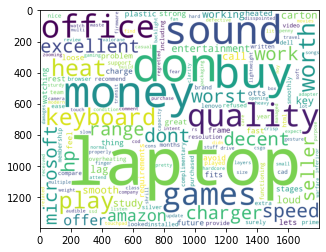

In [8]:
#Wordclouds
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [9]:
#sentiment analysis

#use positive word text file and negative word text file(Already available)

with open(r'E:\Study Materials DATA SCIENCE\360digitmg\Study Material\Text minning and NLP Hands on\Datasets NLP\positive-words.txt', 'r') as pw:
    poswords = pw.read()
with open(r'E:\Study Materials DATA SCIENCE\360digitmg\Study Material\Text minning and NLP Hands on\Datasets NLP\negative-words.txt', 'r') as nw:
    negwords = nw.read()

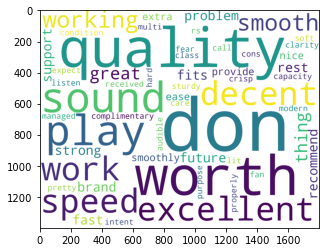

In [10]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_rev_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

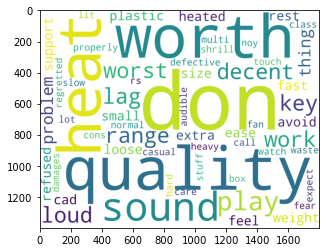

In [11]:
# Negative word cloud
# Choosing the only words which are present in negative words
ip_neg_in_neg = " ".join ([w for w in ip_rev_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [12]:
# wordcloud with bigram
import nltk
from wordcloud import WordCloud, STOPWORDS

WNL = nltk.WordNetLemmatizer()

# Lowercase and tokenize
text = ip_rev_string.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

#tokenaization
tokens = nltk.word_tokenize(text)  #tokenized word
text1 = nltk.Text(tokens)          #tokenized word => text

#remove extra characters
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)

# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Best to get the lemmatize of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

#Create a bigram list
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))

#join each tuple by using " " between them
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print(dictionary2)


['quality speed', 'speed thing', 'thing problem', 'problem future', 'future plastic', 'plastic frame', 'frame loose', 'loose dont', 'dont feel', 'feel strong', 'strong let', 'let heated', 'heated watching', 'watching otts', 'otts rest', 'rest excellent', 'excellent decent', 'decent laptop', 'laptop fit', 'fit requirement', 'requirement charger', 'charger heat', 'heat fast', 'fast charge', 'charge laptop', 'laptop stage', 'stage avoid', 'avoid overheating', 'overheating charger', 'charger surely', 'surely looked', 'looked laptop', 'laptop compare', 'compare brand', 'brand lenovo', 'lenovo dell', 'dell range', 'range recommend', 'recommend buy', 'buy month', 'month browser', 'browser support', 'support html', 'html video', 'video laptop', 'laptop office', 'office work', 'work including', 'including microsoft', 'microsoft office', 'office cad', 'cad functioning', 'functioning smoothly', 'smoothly game', 'game played', 'played ease', 'ease worst', 'worst resolution', 'resolution microsoft'

In [13]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_ #to print bigram generated and its unique ID

#to see the count/frequency of each bigram words
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('microsoft office', 2), ('laptop entertainment', 2), ('entertainment study', 2), ('play game', 2), ('quality speed', 1), ('speed thing', 1), ('thing problem', 1), ('problem future', 1), ('future plastic', 1), ('plastic frame', 1), ('frame loose', 1), ('loose dont', 1), ('dont feel', 1), ('feel strong', 1), ('strong let', 1), ('let heated', 1), ('heated watching', 1), ('watching otts', 1), ('otts rest', 1), ('rest excellent', 1), ('excellent decent', 1), ('decent laptop', 1), ('laptop fit', 1), ('fit requirement', 1), ('requirement charger', 1), ('charger heat', 1), ('heat fast', 1), ('fast charge', 1), ('charge laptop', 1), ('laptop stage', 1), ('stage avoid', 1), ('avoid overheating', 1), ('overheating charger', 1), ('charger surely', 1), ('surely looked', 1), ('looked laptop', 1), ('laptop compare', 1), ('compare brand', 1), ('brand lenovo', 1), ('lenovo dell', 1), ('dell range', 1), ('range recommend', 1), ('recommend buy', 1), ('buy month', 1), ('month browser', 1), ('browser sup

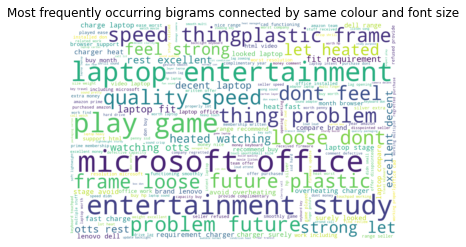

In [14]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords, background_color='White')
wordCloud.generate_from_frequencies(words_dict)

plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()